In [1]:
%load_ext autoreload
%autoreload 2

In [25]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import os

In [192]:
basedir = os.getcwd()
files = np.array(os.listdir(basedir))
files = files[np.array(['.npy' in file for file in files])]
files = files[np.array(['att'not in file for file in files])]
files = sorted(files, key=lambda f: float(f.split('_')[1].split('mW')[0]))
print(files)

['5ps_0.3mW_250kHz_2.npy', '5ps_0.3mW_250kHz.npy', '5ps_3.3mW_250kHz.npy', '5ps_8.5mW_250kHz_2.npy', '5ps_8.5mW_250kHz.npy', '5ps_18mW_250kHz.npy', '5ps_31mW_250kHz.npy', '5ps_45mW_250kHz.npy', '5ps_58mW_250kHz.npy', '5ps_70mW_250kHz.npy', '5ps_84mW_250kHz.npy', '5ps_103mW_250kHz.npy']


In [171]:
my_cmap = cm.get_cmap('jet')
xr = np.linspace(0,1, 256*2)
my_cmap_listed = my_cmap(xr) 
#from matplotlib.colors import ListedColormap
#my_cmap = ListedColormap(my_cmap_listed)

Text(0.5, 1.0, 'Cross Correlator R&D UV Oct 20')

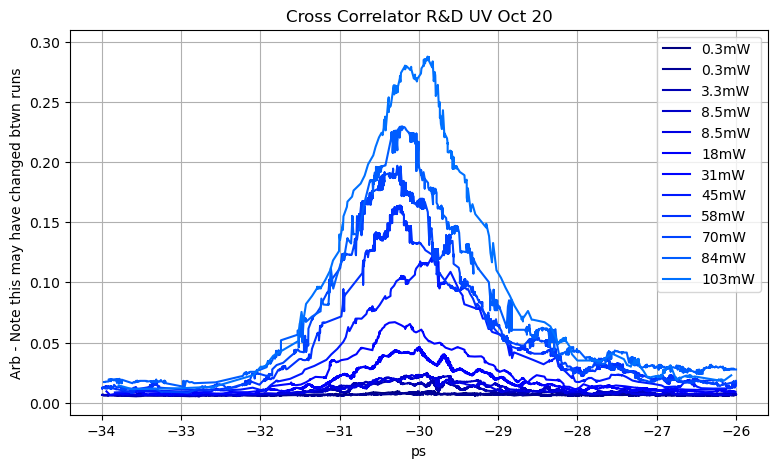

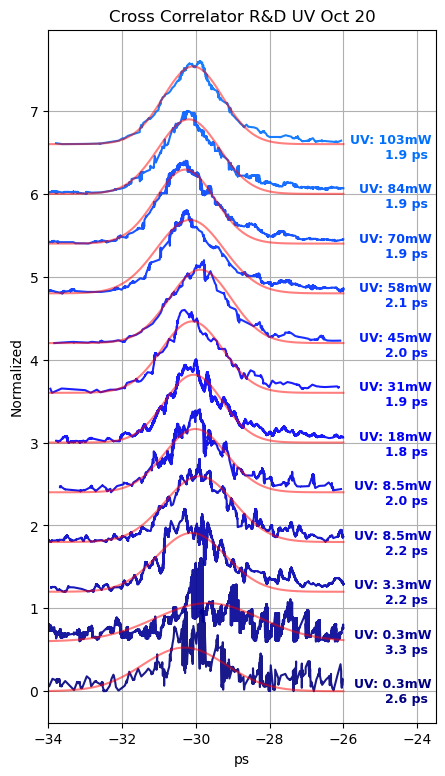

In [201]:
fig, axs = plt.subplots(figsize = (9,5))
for i,f in enumerate(files):
    dat = np.load(f,allow_pickle=True)[()]
    x = np.array(dat['x'])
    y = dat['y']
    y = y[(x<-26)&(x>-34)]
    x = x[(x<-26)&(x>-34)]
    #y = (y-np.min(y))/(np.max(y)-np.min(y))
    axs.plot(x[np.argsort(x)],y[np.argsort(x)], color = my_cmap_listed[i*11], label = f.split('_')[1].split('mW')[0] + 'mW')
    
plt.legend(loc ='best')
#plt.xlim(-38, -23)
plt.ylim(-0.01,0.31)
plt.grid()
plt.ylabel('Arb - Note this may have changed btwn runs')
plt.xlabel('ps')
plt.title('Cross Correlator R&D UV Oct 20')

fig, axs = plt.subplots(figsize = (5,9))
for i,f in enumerate(files):
    dat = np.load(f,allow_pickle=True)[()]
    x = np.array(dat['x'])
    y = dat['y']
    y = y[(x<-26)&(x>-34)]
    x = x[(x<-26)&(x>-34)]
    y = (y-np.min(y))/(np.max(y)-np.min(y))
    axs.plot(x[np.argsort(x)],y[np.argsort(x)]+i*0.6, alpha = 0.9, color = my_cmap_listed[i*11])
    a,mu,sig = gaus_fit(x[np.argsort(x)],y[np.argsort(x)])

    l = 'UV: ' +f.split('_')[1].split('mW')[0] + 'mW\n' + '%1.1f ps ' %(2.335*sig)
   
    axs.plot(np.linspace(-34,-26,100), gaus(np.linspace(-34,-26,100),a,mu,sig)+i*0.6, alpha = 0.5, color = 'r')

    axs.text(0.99, 0.025+i/14, l , fontweight="heavy", color=my_cmap_listed[i*11],
                ha="right", va="bottom", transform=axs.transAxes, fontsize = 9)

#plt.legend(loc ='best')
plt.xlim(-34, -23.5)
#plt.ylim(-0.01,6.1)
plt.grid()
plt.ylabel('Normalized')
plt.xlabel('ps')
plt.title('Cross Correlator R&D UV Oct 20')

In [119]:
basedir = os.getcwd()
files = np.array(os.listdir(basedir))
files = files[np.array(['att' in file for file in files])]
files = sorted(files, key=lambda f: float(f.split('ps')[0]))
print(files)

['3ps_49mW_50att_250kHz.npy', '4ps_29mW_50att_250kHz.npy', '5ps_17mW_50att_250kHz.npy', '6ps_12mW_50att_250kHz.npy', '7ps_8.5mW_50att_250kHz.npy', '8ps_6mW_50att_250kHz.npy']


In [128]:
def centroid(s):
    M = np.sum(s) - np.mean(s[:3])
    centroid =1/M*np.sum(s*np.arange(0,len(s)))
    
    return int(centroid)

In [168]:
from scipy.optimize import curve_fit
def gaus(x, a, mu, sig):
    return a*1/sig/np.sqrt(2*np.pi)*np.exp(-0.5*((x-mu)/sig)**2)


def gaus_fit(t,spec):
    #spec = Et*Et.conj()
    popt, pcov = curve_fit(gaus,t,spec, bounds=([0.1, -35, 0.01], [100, 5, 12]))
    a, mu, sig = popt
    return a, mu, sig #FWHM is 2.355*sig


Text(0.5, 1.0, 'Cross Correlator R&D UV Oct 20')

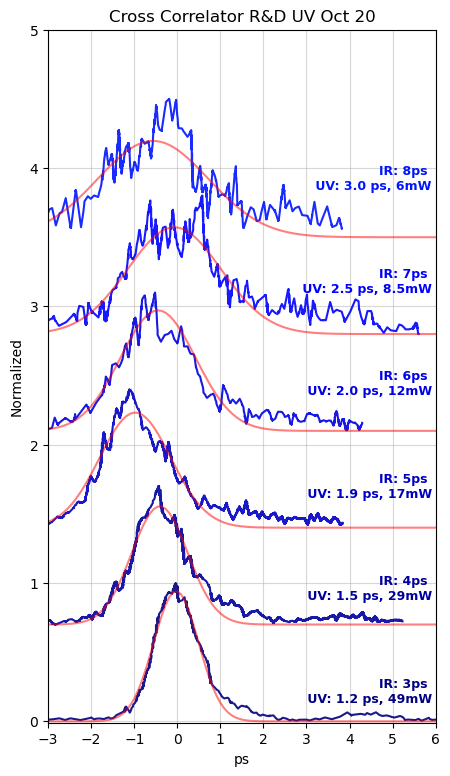

In [165]:
fig, axs = plt.subplots(figsize = (5,9))
for i,f in enumerate(files):
    dat = np.load(f,allow_pickle=True)[()]
    x = np.array(dat['x'])
    y = dat['y']
    y =y[np.argsort(x)]
    x = x[np.argsort(x)]
    x = x[3:-3]
    y = y[3:-3]
    x = x - x[centroid(y)]
    y = (y-np.min(y))/(np.max(y)-np.min(y))
    a,mu,sig = gaus_fit(x,y)
    l = 'IR: ' +f.split('ps')[0]+ 'ps \n '+ 'UV: %1.1f ps, ' %(2.335*sig) +f.split('_')[1].split('mW')[0] + 'mW'
    axs.plot(x[np.argsort(x)],y[np.argsort(x)]+i*0.7, alpha = 0.9, color = my_cmap_listed[i*15]) #, label = l)
    axs.plot(np.linspace(-3,6,100), gaus(np.linspace(-3,6,100),a,mu,sig)+i*0.7, alpha = 0.5, color = 'r')

    axs.text(0.99, 0.025+i*0.148, l , fontweight="heavy", color=my_cmap_listed[i*15],
                ha="right", va="bottom", transform=axs.transAxes, fontsize = 9)

  
#plt.legend(loc ='best')
plt.xlim(-3, 6)
plt.ylim(-0.01,5)
plt.grid(alpha = 0.5)
plt.ylabel('Normalized')
plt.xlabel('ps')
plt.title('Cross Correlator R&D UV Oct 20')

Text(0, 0.5, 'UV ps')

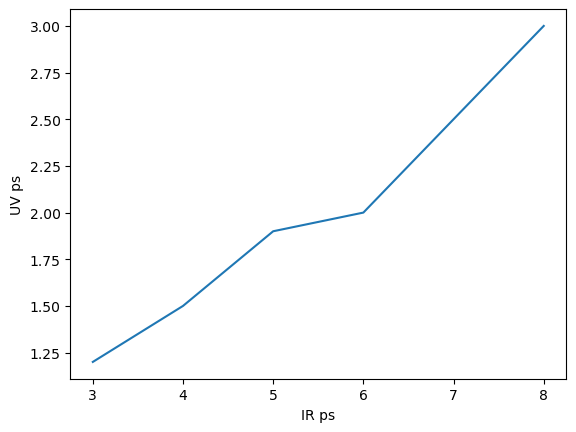

In [203]:
plt.plot([3,4,5,6,7,8], [1.2, 1.5, 1.9, 2.0, 2.5, 3.0])
plt.xlabel('IR ps')
plt.ylabel('UV ps')

(254.0, 259.0)

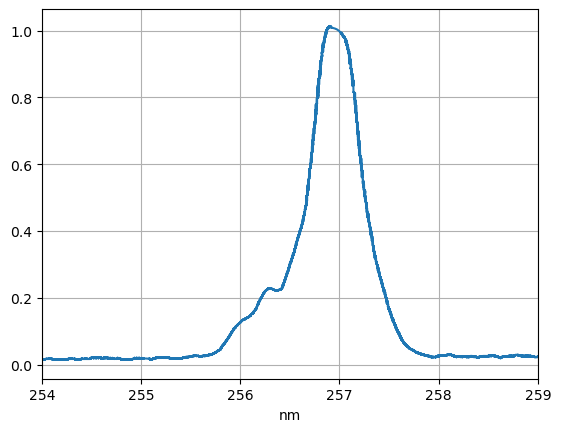

In [216]:
dat = np.load('5ps_UV_spectra.npy',allow_pickle=True)[()]
x = np.array(dat['x'])
y = dat['y']
x = x[y<1.1]
y = y[y<1.1]
plt.plot(x[np.argsort(x)][10:], y[np.argsort(x)][10:])
plt.xlabel('nm')
plt.grid()
plt.xlim(254,259)

In [210]:
y[np.argsort(x)]

array([1.3815394 , 1.3815394 , 1.3815394 , ..., 0.02604686, 0.02502655,
       0.02655702])

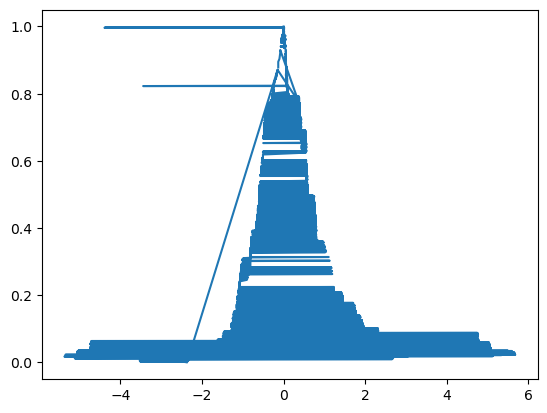

In [114]:
dat = np.load('4ps_29mW_50att_250kHz.npy',allow_pickle=True)[()]
x = np.array(dat['x'])
y = dat['y']
x = x - x[np.argmax(y)]
y = (y-np.min(y))/(np.max(y)-np.min(y))

plt.plot(x,y)

In [115]:
np.where((x<-2)&(y>0.4))

(array([  4,   5,   9, 335]),)

In [113]:
187 not in [187, 188, 277, 380]

False

In [116]:
xstr= []
ystr = []
for i in range(len(dat['x'])):
    if i not in [  4,   5,   9, 335]:
        xstr.append(dat['x'][i])
        ystr.append(dat['y'][i])
xstr = np.array(xstr)
ystr = np.array(ystr)

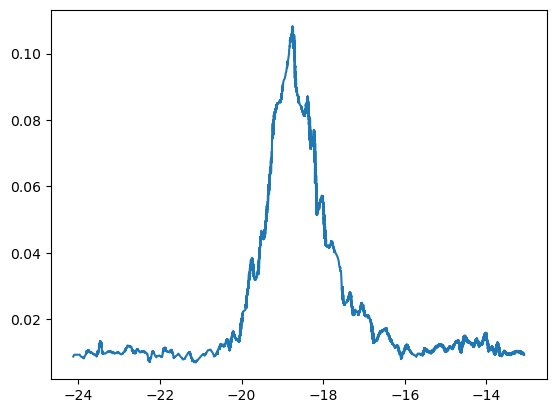

In [117]:
plt.plot(xstr[np.argsort(xstr)],ystr[np.argsort(xstr)])

In [118]:
data = {}
data['x'] = xstr
data['y'] = ystr
np.save('4ps_29mW_50att_250kHz.npy',data)